In [1]:
%load_ext autoreload
%autoreload 2
from get import *

{0: '00_toy_dataset', 1: '01_mnist_cc', 2: '02_mnist_constant_image', 3: '03_mnist_constant_image_random_row', 4: '04_mnist_uniform_color_random_row', 5: '05_mnist_uniform_color_low_mix_rate', 6: '06_mnist_sum', 8: '08_mnist_sum_noise_level', 12: '12_mnist_mysterious', 13: '13_mnist_mysterious', 23: '23_mnist_embed', 456: '456_mnist_embed', 888: '888_vehicle_animal', 999: '999_humans'}


Labeled ds shape:  torch.Size([500, 2])
Unlabeled ds shape:  torch.Size([500, 2])
Validation ds shape:  torch.Size([500, 2])
Labels shape:  torch.Size([500])
Labeled ds labels:  [0. 1.]



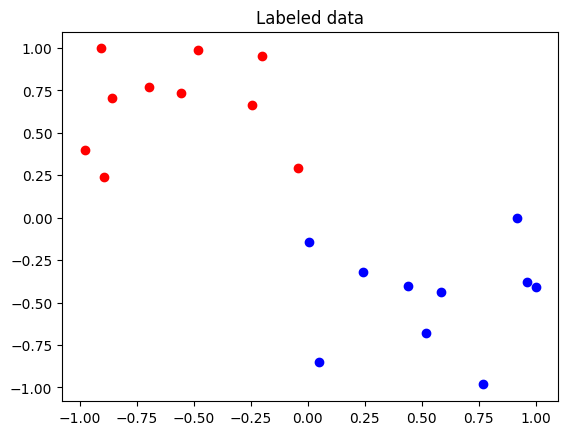

tensor([ 0.2066, -0.4897])
tensor([-0.7494,  0.9899])
tensor([ 0.8183, -0.0747])
tensor([-0.3147,  0.1282])
tensor([0.5876, 0.4036])
tensor([0.2899, 0.6946])
tensor([ 0.5050, -0.2940])
tensor([-0.6032,  0.6897])
tensor([ 0.7506, -0.2969])
tensor([-0.7674, -0.4362])
tensor([-7.7557e-04,  9.0932e-01])
tensor([ 0.9842, -0.7537])
tensor([-0.3124,  0.6905])
tensor([0.7013, 0.8045])
tensor([-0.4549,  0.6811])
tensor([-0.3653, -0.4712])
tensor([ 0.2110, -0.4333])
tensor([ 0.4921, -0.3250])
tensor([0.3996, 0.0154])
tensor([-0.6510,  0.7096])


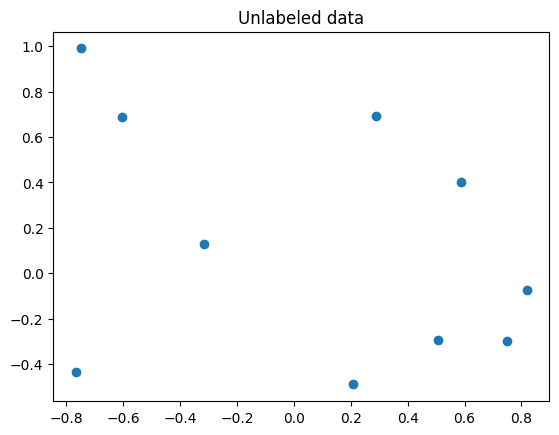

In [2]:
# Load dataset 0
X_labeled, y_labeled, X_unlabeled, X_val = load_datasets(n_dataset = 0)

display_dataset(n_dataset = 0)

In [3]:
# Window function
def window_function0(X : torch.Tensor):
    """From a dataset, return the uncorellated modified dataset"""
    return X[:, 0].view(X.shape[0], 1)    # only takes first component

# Get uncorrelated data
uX_labeled = window_function0(X_labeled)
uX_unlabeled = window_function0(X_unlabeled)
uX_val = window_function0(X_val)
print(uX_val.shape, uX_labeled.shape, uX_unlabeled.shape)

torch.Size([500, 1]) torch.Size([500, 1]) torch.Size([500, 1])


In [4]:
# Torch regression model
import torch

inputDim = 1       # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.001 
epochs = 10000

class LogisticRegression(torch.nn.Module):
     def __init__(self, input_dim, output_dim):
         super(LogisticRegression, self).__init__()
         self.linear = torch.nn.Linear(input_dim, output_dim)
     def forward(self, x):
         outputs = torch.sigmoid(self.linear(x))
         return outputs



model = LogisticRegression(inputDim, outputDim)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)


In [5]:

losses = []
losses_test = []
Iterations = []
iter = 0
testing = False

# X_train, X_test, y_train, y_test = train_test_split(uX_labeled, y_labeled)
X_train, y_train = uX_labeled, y_labeled

print("X SHAPE:", X_train.shape)

for epoch in tqdm(range(int(epochs)),desc='Training Epochs'):
    x = X_train
    labels = y_train
    optimizer.zero_grad() # Setting our stored gradients equal to zero
    outputs = model(X_train)
    loss = criterion(torch.squeeze(outputs), labels) 
    
    loss.backward() # Computes the gradient of the given tensor w.r.t. the weights/bias
    
    optimizer.step() # Updates weights and biases with the optimizer (SGD)
    
    
    if iter%1000==0:
        with torch.no_grad():
            if testing:
                # Calculating the loss and accuracy for the test dataset
                correct_test = 0
                total_test = 0
                outputs_test = torch.squeeze(model(X_test))
                loss_test = criterion(outputs_test, y_test)
                
                predicted_test = outputs_test.round().detach().numpy()
                total_test += y_test.size(0)
                correct_test += np.sum(predicted_test == y_test.detach().numpy())
                accuracy_test = 100 * correct_test/total_test
                losses_test.append(loss_test.item())
            
            # Calculating the loss and accuracy for the train dataset
            total = 0
            correct = 0
            total += y_train.size(0)
            correct += np.sum(torch.squeeze(outputs).round().detach().numpy() == y_train.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)
            
            # print(f"Iteration: {iter}. \nTest - Loss: {loss_test.item()}. Accuracy: {accuracy_test}")
            print(f"Train -  Loss: {loss.item()}. Accuracy: {accuracy}\n")
    iter+=1

X SHAPE: torch.Size([500, 1])


Training Epochs:   0%|          | 0/10000 [00:00<?, ?it/s]

Train -  Loss: 0.2483978122472763. Accuracy: 49.0

Train -  Loss: 0.13080762326717377. Accuracy: 95.0

Train -  Loss: 0.09422915428876877. Accuracy: 99.8

Train -  Loss: 0.07443837821483612. Accuracy: 99.8

Train -  Loss: 0.06178148835897446. Accuracy: 99.8

Train -  Loss: 0.05280650407075882. Accuracy: 99.8

Train -  Loss: 0.0459895133972168. Accuracy: 99.6

Train -  Loss: 0.04057687893509865. Accuracy: 99.6

Train -  Loss: 0.036156632006168365. Accuracy: 99.6

Train -  Loss: 0.03248126804828644. Accuracy: 99.6



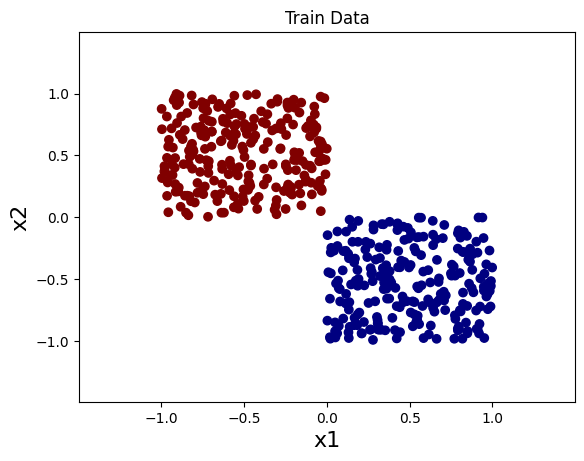

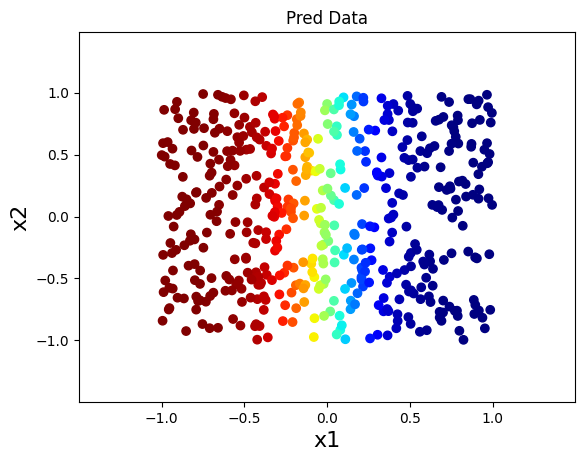

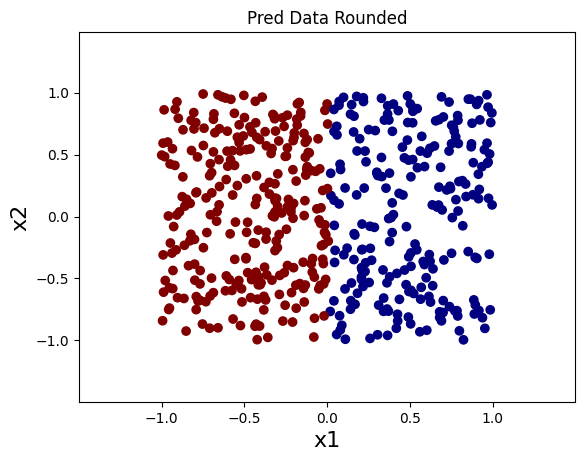

In [6]:
def model_plot(model,X,y,title):
    parm = {}
    b = []
    for name, param in model.named_parameters():
        parm[name]=param.detach().numpy()  
    
    w = parm['linear.weight'][0]
    b = parm['linear.bias'][0]
    plt.scatter(X[:, 0], X[:, 1], c=y,cmap='jet')
    u = np.linspace(X[:, 0].min(), X[:, 0].max(), 2)
    plt.xlim(X[:, 0].min()-0.5, X[:, 0].max()+0.5)
    plt.ylim(X[:, 1].min()-0.5, X[:, 1].max()+0.5)
    plt.xlabel('x1',fontsize=16) # Normally you can just add the argument fontweight='bold' but it does not work with latex
    plt.ylabel('x2',fontsize=16)
    plt.title(title)
    plt.show()


# Train Data
model_plot(model,X_labeled,y_labeled,'Train Data')

# Test Dataset Results
with torch.no_grad():
    y_pred = model(uX_val)
model_plot(model,X_val,y_pred,'Pred Data')
    
y_pred = y_pred.round().int()
model_plot(model,X_val,y_pred,'Pred Data Rounded')


In [7]:
submit_results(model, uX_val, "0_final")